In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# import libraries 
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
def load_data(data_path="/content/drive/MyDrive/Data /"):
#get the list of tfidf values of a sparse_r_d
    def sparse_to_dense(sparse_r_d,vocab_size):
        r_d = [0.0 for _ in range(vocab_size)]
        indices_tfidfs = sparse_r_d.split()
        #store tfidf values in initialized r_d
        for index_tfidf in indices_tfidfs:
            index = int(index_tfidf.split(':')[0])
            tfidf = float(index_tfidf.split(':')[1])
            r_d[index] = tfidf
        return np.array(r_d)
    
    #read data and vocab_size
    with open(data_path + "data_tf_idf.txt",errors="ignore") as f:
        d_lines = f.read().splitlines()
    with open(data_path + "words_idfs.txt",errors="ignore") as f:
        vocab_size = len(f.read().splitlines())
    data, labels=[], []
    #crawl data set and labels set
    for data_id, d in enumerate(d_lines):
        features = d.split('<fff>')
        label, doc_id = int(features[0]), int(features[1])
        r_d = sparse_to_dense(sparse_r_d = features[2], vocab_size=vocab_size)
        #add to data and labels
        data.append(r_d)
        labels.append(label)
    return np.array(data), np.array(labels)

In [6]:
#load data
X,y = load_data()

#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state=1)

In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = X_train.shape[1:]),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(50, activation = "relu"),
    keras.layers.Dense(20, activation = "softmax")])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 14234)             0         
                                                                 
 dense (Dense)               (None, 100)               1423500   
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 20)                1020      
                                                                 
Total params: 1,429,570
Trainable params: 1,429,570
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train,
                    epochs=50,
                    validation_data = (X_val,y_val))

Epoch 1/50
354/354 [==============================] - 2s 5ms/step - loss: 2.4038 - accuracy: 0.6156 - val_loss: 2.4052 - val_accuracy: 0.5890
Epoch 2/50
354/354 [==============================] - 2s 5ms/step - loss: 2.3109 - accuracy: 0.6301 - val_loss: 2.3150 - val_accuracy: 0.6110
Epoch 3/50
354/354 [==============================] - 1s 4ms/step - loss: 2.2109 - accuracy: 0.6600 - val_loss: 2.2186 - val_accuracy: 0.6336
Epoch 4/50
354/354 [==============================] - 1s 4ms/step - loss: 2.1073 - accuracy: 0.6780 - val_loss: 2.1207 - val_accuracy: 0.6540
Epoch 5/50
354/354 [==============================] - 1s 4ms/step - loss: 2.0026 - accuracy: 0.7059 - val_loss: 2.0236 - val_accuracy: 0.6699
Epoch 6/50
354/354 [==============================] - 1s 4ms/step - loss: 1.8989 - accuracy: 0.7201 - val_loss: 1.9269 - val_accuracy: 0.6954
Epoch 7/50
354/354 [==============================] - 1s 4ms/step - loss: 1.7974 - accuracy: 0.7328 - val_loss: 1.8336 - val_accuracy: 0.7031
Epoch 

In [11]:
model.evaluate(X_test, y_test)

118/118 [==============================] - 0s 3ms/step - loss: 0.5010 - accuracy: 0.8607


[0.5009697079658508, 0.8607426881790161]

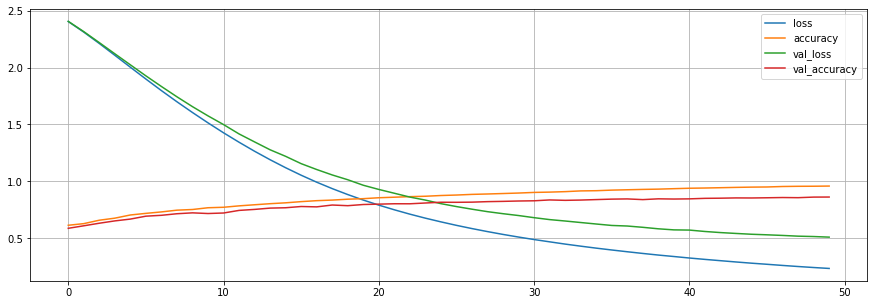

In [12]:
pd.DataFrame(history.history).plot(figsize=(15,5));
plt.grid("True")

In [13]:
model.predict(X_test[:1])

1/1 [==============================] - 0s 89ms/step


array([[6.6762780e-08, 1.8221459e-06, 8.0150306e-07, 7.5501011e-06,
        5.3138117e-04, 1.6032087e-06, 2.1484385e-03, 2.6661446e-05,
        1.6544660e-04, 9.8757464e-01, 6.5176813e-03, 6.6849175e-08,
        5.4229907e-04, 6.7010797e-06, 1.1088160e-04, 4.9610503e-07,
        4.2794512e-05, 2.2957767e-03, 2.4857793e-05, 4.8127802e-08]],
      dtype=float32)

In [16]:
#return predict newsgroup
np.argmax(model.predict(X_test[:1]),axis = -1)

1/1 [==============================] - 0s 16ms/step


array([9])